In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from astropy.coordinates import SkyCoord
from astropy import units as u
import peakutils

import aplpy
from astropy.io import fits
import astropy.wcs as wcs

from astropy.time import Time as aTime

import datetime as dt, time

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [187]:
with open('rfc_2023b.txt') as w:
    rfc2023b = np.array([s.split() for s in w.readlines()[211:]])
    
r = rfc2023b[:,(0,2,3,6,9,10,11,12,17,18,15,16)]

ra_hms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
dc_dms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
for i in range(rfc2023b.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(rfc2023b[i,3],rfc2023b[i,4],rfc2023b[i,5])
    dc_dms[i]= '{}d{}m{}s'.format(rfc2023b[i,6],rfc2023b[i,7],rfc2023b[i,8])
    
r[:,2] = ra_hms
r[:,3] = dc_dms

R = pd.DataFrame(r)

In [194]:
t1 = SkyCoord('18h40m34.51s -04d57m14.4s')
t2 = SkyCoord('18h41m51.06s -05d01m43.5s')
c = SkyCoord(ra_hms,dc_dms)

sep1 = (c.separation(t1).value < 5.0)
sep2 = (c.separation(t2).value < 5.0)

In [195]:
indx  = (R[8].astype(float) > .07)*sep1
c1    = c[indx]
names = r[indx,1]

In [196]:
names

array(['J1821-0502', 'J1825-0737', 'J1827-0405', 'J1834-0301',
       'J1848-0822', 'J1849-0856', 'J1850-0906', 'J1857-0303',
       'J1900-0415'], dtype='<U10')

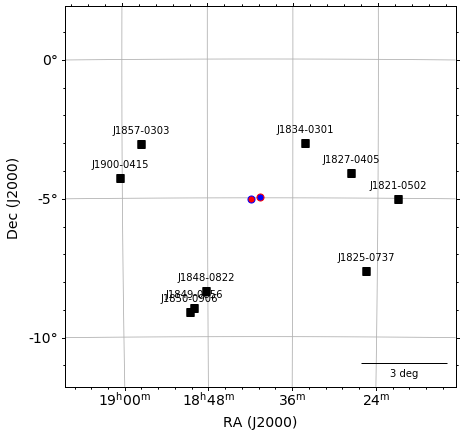

In [192]:
imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='red',linewidth=1,fc='blue',zorder=99)
ax.show_markers(t2.ra.deg,t2.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='k',zorder=99);

for i in range(len(names)):
    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])


In [193]:
R[(R[8].astype(float) > .07)*sep1]

,0,1,2,3,4,5,6,7,8,9,10,11
16973,C,J1821-0502,18h21m11.8,-05d02m20.,0.12,0.17,0.012,693,0.196,0.029,-1.00,-1.00
17043,C,J1825-0737,18h25m37.6,-07d37m30.,0.11,0.15,0.027,1862,0.305,0.106,0.318,0.020
17069,C,J1827-0405,18h27m45.0,-04d05m44.,0.12,0.16,-0.078,2389,0.217,0.047,0.354,0.025
17179,C,J1834-0301,18h34m14.0,-03d01m19.,0.12,0.17,0.034,1719,0.148,0.025,0.147,0.026
17363,C,J1848-0822,18h48m13.8,-08d22m01.,0.58,1.26,-0.341,36,0.081,0.053,0.077,0.022
17393,C,J1849-0856,18h49m54.4,-08d56m55.,0.55,1.14,-0.188,36,0.084,-1.00,0.092,-1.00
17402,C,J1850-0906,18h50m37.2,-09d06m35.,0.38,0.80,0.009,85,0.098,0.074,0.077,0.051
17481,C,J1857-0303,18h57m19.8,-03d03m25.,0.47,0.95,-0.241,36,0.095,0.053,0.067,0.037
17517,C,J1900-0415,19h00m18.0,-04d15m35.,0.86,1.30,-0.004,15,0.090,-1.00,0.081,-1.00


In [183]:
t = np.arange(30,120,1)
rms = 1.2*np.sqrt(3500*750)/np.sqrt(2*2*256e6*t)*1000

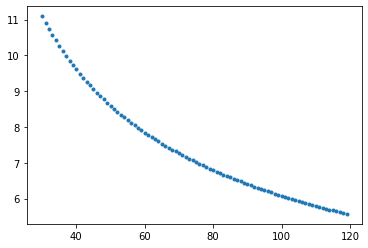

In [184]:
fig, ax = plt.subplots(1)
ax.plot(t,rms,'.')

In [199]:
c.separation(t1).value[(R[8].astype(float) > .07)*sep1]

array([4.82691179, 4.57491038, 3.30933333, 2.49649015, 3.90668145,
       4.61729572, 4.84554331, 4.58876695, 4.96421352])

In [239]:
#with open('icrf3.txt') as w:
#    icrf3 = [s.split() for s in w.readlines()[22:]]

In [261]:
icrf3 = pd.read_fwf('icrf3.txt',skiprows=22).values

In [265]:
ra_hms = np.zeros(shape=icrf3.shape[0]).astype(str)
dc_dms = np.zeros(shape=icrf3.shape[0]).astype(str)
for i in range(icrf3.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(icrf3[i,4],icrf3[i,5],icrf3[i,6])
    dc_dms[i]= '{}d{}m{}s'.format(icrf3[i,7],icrf3[i,8],icrf3[i,9])

In [266]:
ICRF3 = SkyCoord(ra_hms,dc_dms)

In [294]:
I1 = ICRF3[ICRF3.separation(t1).value<3]

In [295]:
c1 = c[c.separation(t1).value<3]

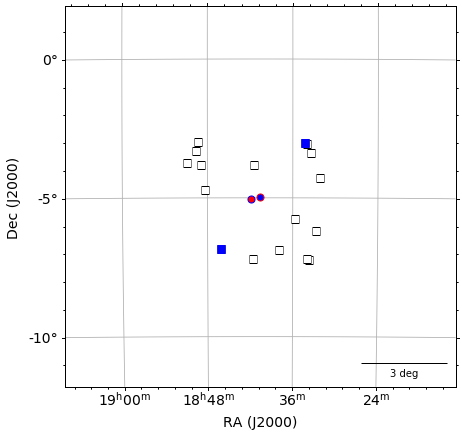

In [296]:
imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='red',linewidth=1,fc='blue',zorder=99)
ax.show_markers(t2.ra.deg,t2.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='w',zorder=99);

ax.show_markers(I1.ra.deg,I1.dec.deg,s=50,
                marker='s',edgecolor='b',linewidth=0.5,fc='b',zorder=99);

#for i in range(len(names)):
#    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])


In [299]:
icrf3[ICRF3.separation(t1).value<3,2]

array(['1831-030', '1843-069'], dtype=object)